In [107]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy

import glob

wave_files = glob.glob("*.wav")

In [113]:
for wave_file in wave_files:
    break
wave_file

'audio_8000Hz_signed16.wav'

In [115]:
wvf = wave.open(wave_file)

In [116]:
wvf

In [117]:
for attr in dir(wvf):
    if attr.startswith("_"):
        continue
    if attr.startswith("get"):
        try:
            value = getattr(wvf, attr)()
            print(f"{attr}:{value}")
        except:
            print(f"{attr}:FAIL")

getcompname:not compressed
getcomptype:NONE
getfp:<chunk.Chunk object at 0x7f969789ca90>
getframerate:8000
getmark:FAIL
getmarkers:None
getnchannels:2
getnframes:14001
getparams:_wave_params(nchannels=2, sampwidth=2, framerate=8000, nframes=14001, comptype='NONE', compname='not compressed')
getsampwidth:2


In [128]:
wave

<module 'wave' from '/usr/lib/python3.8/wave.py'>

In [129]:
from wave import Wave_read

In [134]:
wvf.rewind()
signal = wvf.readframes(-1)
signal = np.frombuffer(signal, np.int16)

In [135]:
channels = [[] for channel in range(wvf.getnchannels())]
for index, datum in enumerate(signal):
    channels[index%len(channels)].append(datum)

In [138]:
len(signal)

28002

In [139]:
len(signal)/2

14001.0

In [144]:
channels[0][0]

189

In [145]:
channels[0][1]

368

In [146]:
channels[1][0]

101

In [147]:
channels[1][1]

114

In [151]:
for idx, channel in enumerate(channels):
    print(f"Chan {idx+1}:")
    print(f"\t{channel[0]}")
    print(f"\t{channel[1]}")
    

Chan 1:
	189
	368
Chan 2:
	101
	114


In [152]:
channels2=np.reshape(signal, (int(len(signal)/2),2), order="A")
channels2

array([[ 189,  101],
       [ 368,  114],
       [ 341,  121],
       ...,
       [-792,  299],
       [-615,  369],
       [-632,  536]], dtype=int16)

In [153]:
channel2[:,1]

array([101, -86], dtype=int16)

In [154]:
channel2[:,0]

array([  189, -1972], dtype=int16)

In [155]:
fs

8000

In [156]:
Time=np.linspace(0, len(signal)/len(channels)/fs, num=int(len(signal)/len(channels)))

In [157]:
len(Time)

14001

In [158]:
len(channel)

14001

In [160]:
Time[-1]

1.750125

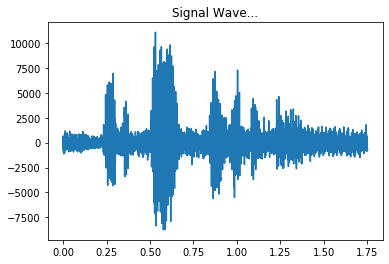

In [161]:
#Plot
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,channels[0])
plt.show()

In [162]:
max_x = 100
max_y = 50

In [163]:
scale_x = max_x/Time[-1]
scale_y = max_y/np.max(np.abs(channel))

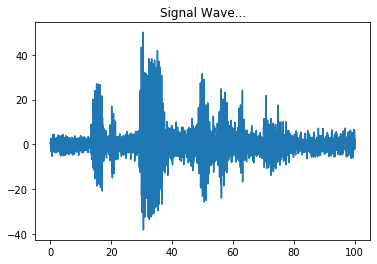

In [166]:
#Plot
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time*scale_x,channels2[:,1]*scale_y)
plt.show()

In [167]:
channels2[:,1]

array([101, 114, 121, ..., 299, 369, 536], dtype=int16)

In [168]:
x = channels2[:,1]

In [170]:
x[:]

array([101, 114, 121, ..., 299, 369, 536], dtype=int16)

In [171]:
len(x[:])

14001

In [ ]:
1:2:len(x)

In [180]:
y = x[range(0, len(x), 2)]

In [181]:
len(y)

7001

In [182]:
max_x

100

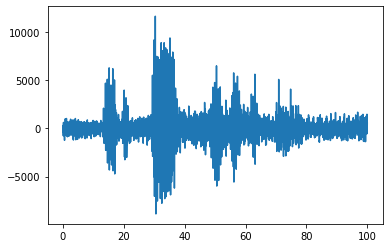

In [183]:
plt.plot(np.linspace(0, max_x, len(y)), y)

In [186]:
np.linspace(0, 100, 50)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [187]:
plot_lines_x = np.linspace(0, 100, 50)

In [188]:
?np.interp

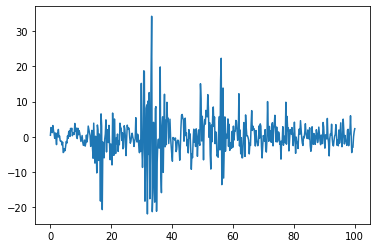

In [198]:
plot_lines_x = np.linspace(0, 100, 500)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channels2[:,1]*scale_y)
plt.plot(plot_lines_x, plot_lines_y)

In [ ]:
channels2[:,1]

In [31]:
idx_1 = np.where(Time>13)[0][0]
idx_2 = np.where(Time<15)[0][-1]

In [32]:
idx_1

624000

In [33]:
idx_2

719999

In [35]:
!pip install scipy

     |████████████████████████████████| 26.0MB 891kB/s eta 0:00:01


In [102]:
import wave    
from scipy import signal    
import numpy as np    
import matplotlib.pyplot as plt    
signal_wave = wave.open('audio.wav', 'r')    
sample_frequency = 16000    
data = np.frombuffer(signal_wave.readframes(sample_frequency), dtype=np.int16)    
sig = signal_wave.readframes(-1)    
sig = np.frombuffer(sig, np.int16)

In [42]:
sig

array([ 80, 338,  61, ...,  57,  29,  57], dtype=int16)

In [43]:
data

array([  0,   0,   0, ..., 343,  95, 361], dtype=int16)

In [45]:
sig = sig[25000:32000]    
left, right = data[0::2], data[1::2]    
lf, rf = abs(np.fft.rfft(left)), abs(np.fft.rfft(right))

<ipython-input-46-ac01207d0a55>:7: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=0).
  Pxx, freqs, bins, im = c.specgram(sig, NFFT=1024, Fs=16000, noverlap=900)
/home/jed/CalvinDaddy/christmas_2019/virtualenv_python3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/jed/CalvinDaddy/christmas_2019/virtualenv_python3.8/lib/python3.8/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/jed/CalvinDaddy/christmas_2019/virtualenv_python3.8/lib/python3.8/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/jed/CalvinDaddy/christmas_2019/virtualenv_python3.8/lib/python3.8/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(ne

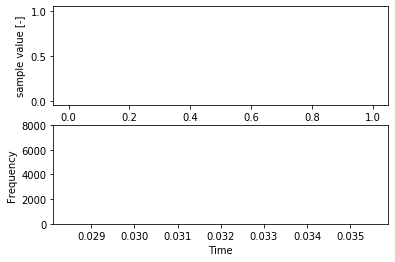

In [46]:
plt.figure(1)    
a = plt.subplot(211)    
a.set_xlabel('time [s]')    
a.set_ylabel('sample value [-]')    
plt.plot(sig)    
c = plt.subplot(212)    
Pxx, freqs, bins, im = c.specgram(sig, NFFT=1024, Fs=16000, noverlap=900)    
c.set_xlabel('Time')    
c.set_ylabel('Frequency')    
plt.show()

In [47]:
file = "audio.wav"

In [56]:
wav_file = wave.open(file,'r')

#Extract Raw Audio from Wav File
signal = wav_file.readframes(-1)
if wav_file.getsampwidth() == 1:
    signal = np.array(np.frombuffer(signal, dtype=np.uint8)-128, dtype=np.uint17)
elif wav_file.getsampwidth() == 2:
    signal = np.frombuffer(signal, dtype=np.uint16)
else:
    raise RuntimeError("Unsupported sample width")

# http://schlameel.com/2017/06/09/interleaving-and-de-interleaving-data-with-python/
deinterleaved = [signal[idx::wav_file.getnchannels()] for idx in range(wav_file.getnchannels())]

#Get time from indices
fs = wav_file.getframerate()
Time=np.linspace(0, len(signal)/wav_file.getnchannels()/fs, num=int(len(signal)/wav_file.getnchannels()))

                 
                 

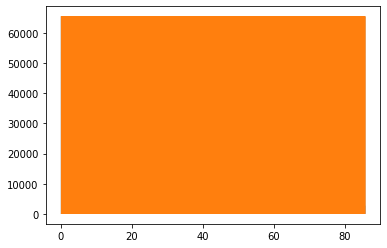

In [57]:
#Plot
plt.figure(1)
#don't care for title
#plt.title('Signal Wave...')
for channel in deinterleaved:
    plt.plot(Time,channel, linewidth=.125)
#don't need to show, just save
#plt.show()
plt.savefig('audio.png', dpi=72)

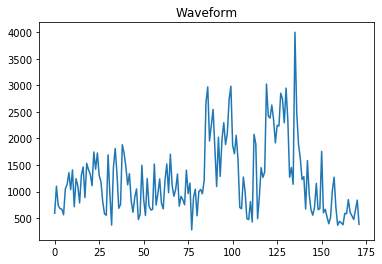

In [51]:
with wave.open(file,'r') as wav_file:
    num_channels = wav_file.getnchannels()
    frame_rate = wav_file.getframerate()
    downsample = math.ceil(frame_rate * num_channels / 2) # Get two samples per second!

    process_chunk_size = 600000 - (600000 % frame_rate)

    signal = None
    waveform = np.array([])

    while signal is None or signal.size > 0:
        signal = np.frombuffer(wav_file.readframes(process_chunk_size), dtype='int16')

        # Take mean of absolute values per 0.5 seconds
        sub_waveform = np.nanmean(
            np.pad(np.absolute(signal), (0, ((downsample - (signal.size % downsample)) % downsample)), mode='constant', constant_values=np.NaN).reshape(-1, downsample),
            axis=1
        )

        waveform = np.concatenate((waveform, sub_waveform))

    #Plot
    plt.figure(1)
    plt.title('Waveform')
    plt.plot(waveform)
    plt.show()